In [1]:
import os 
os.chdir('/home/jonfrey/ASL')
import sys
sys.path.append( os.path.join( os.getcwd(),'src' ) ) 
import numpy as np
from scipy import io as io
root='/media/scratch1/jonfrey/datasets/NYU_v2/nyu_depth_v2_labeled.mat'
import pandas as pd 
import h5py
with h5py.File(root, 'r') as f:
    keys = f.keys()
    instances = np.asarray( f['instances'], dtype=np.float32 )
    images =  np.asarray( f['images'], dtype=np.float32)
    labels =  np.asarray( f['labels'], dtype=np.float32 )    
    images = np.moveaxis(images, 1, 3)
    images = np.moveaxis(images, 1, 2)
    labels = np.moveaxis(labels, 1, 2)
    instances = np.moveaxis(instances, 1, 2)


names = pd.read_csv('/home/jonfrey/ASL/cfg/dataset/names.csv').to_numpy()[:,0]
scenes = pd.read_csv('/home/jonfrey/ASL/cfg/dataset/scenes.csv').to_numpy()[:,0]
sceneTypes = pd.read_csv('/home/jonfrey/ASL/cfg/dataset/sceneTypes.csv').to_numpy()[:,0]

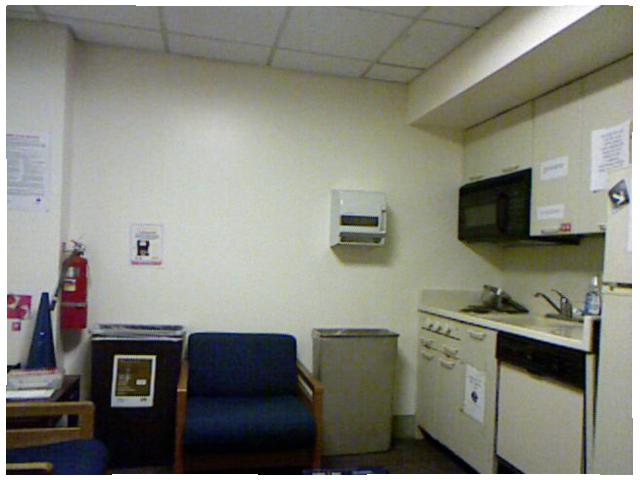

FIRST torch.Size([1, 640, 480])
torch.Size([3, 640, 480])
FIRST torch.Size([1, 400, 400])
torch.Size([3, 400, 400])
SEC torch.Size([1, 400, 400])
torch.Size([3, 400, 400])
Helo (400, 400, 1)


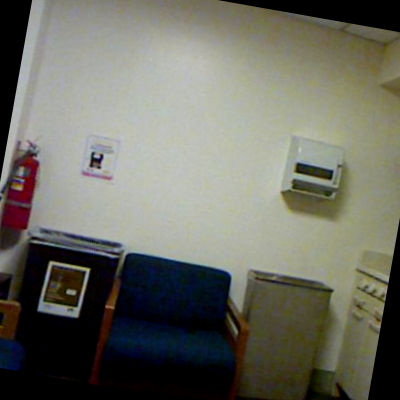

(400, 400, 1)


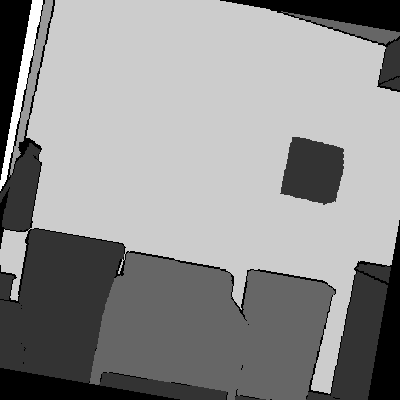

In [203]:
from PIL import Image
import imageio
from torchvision.transforms import functional as F
# names[0], scenes[0]
# type( images[0] )
# img = images[0]

# data = np.zeros( (480,640,3))

# imageio.imwrite('/home/jonfrey/tmp/img.png', np.uint8( images[0] )) 
# imageio.imwrite('/home/jonfrey/tmp/label.png', np.uint8( labels[0] )) 
# # print( data.shape )
display( Image.fromarray( np.uint8( images[0]) ))
# display( Image.fromarray( np.uint8( labels[0]) ))

from torchvision import transforms as tf
import torch
import PIL
output_size = 400
_transform = tf.Compose([
    tf.ColorJitter(
        brightness=0.3,
        contrast=0.3,
        saturation=0.3,
        hue=0.05),
    tf.RandomRotation(degrees = 10, resample = PIL.Image.NEAREST ),
    tf.RandomCrop( output_size ),
    tf.RandomHorizontalFlip( p=0.5 )
])

jitter = tf.ColorJitter(
        brightness=0.3,
        contrast=0.3,
        saturation=0.3,
        hue=0.05)
crop = tf.RandomCrop( output_size )
rot = tf.RandomRotation(degrees = 10, resample = PIL.Image.BILINEAR)
flip = tf.RandomHorizontalFlip( p=0.5 )

img = torch.from_numpy(images[0]/255)
img = img.permute(2,1,0)

label = torch.from_numpy(instances[0]).permute(0,1)[None,:,:]
img = jitter(img)
print( 'FIRST', label.shape )
print( img.shape )

i, j, h, w = crop.get_params( img, (output_size,output_size) )
img = F.crop(img, i, j, h, w)
label = F.crop(label, i, j, h, w)


print( 'FIRST', label.shape )
print( img.shape )

angle = rot.get_params( degrees = (10,10) )
img = F.rotate(img, angle, resample=PIL.Image.BILINEAR , expand=False, center=None, fill=None)
print( 'SEC',label.shape )
print( img.shape )
label = F.rotate(label, angle, resample=PIL.Image.NEAREST , expand=False, center=None, fill=None)

if torch.rand(1) < 0.5:
    img = F.hflip(img)
    label = F.hflip(label)



#img_out = _transform(img)
# print(img_out)
# print(img_out.permute(2,1,0).shape )

l = label.permute(2,1,0).numpy()
print('Helo',l.shape)

res = np.uint8( label.permute(2,1,0).numpy() * (255/float(label.max())) ) 
display( Image.fromarray( np.uint8( img.permute(2,1,0).numpy()*255 )))  
print(res.shape)
display( Image.fromarray(res[:,:,0]) )


In [ ]:
with h5py.File(root, 'r') as f:
    images =  np.asarray( f['images'], dtype=np.float32)
    

In [175]:
instances.shape

(1449, 640, 480)

In [25]:
index = pd.read_csv(f'/home/jonfrey/ASL/cfg/dataset/nyu/train_indexes.csv').to_numpy()[:,0]
images.shape
sp = images[index]
sp.shape

(795, 480, 640, 3)

In [35]:
(labels, counts) = np.unique(sceneTypes, return_counts=True)
labels = labels.tolist()
counts = counts.tolist()

['basement',
 'bathroom',
 'bedroom',
 'bookstore',
 'cafe',
 'classroom',
 'computer_lab',
 'conference_room',
 'dinette',
 'dining_room',
 'excercise_room',
 'foyer',
 'furniture_store',
 'home_office',
 'home_storage',
 'indoor_balcony',
 'kitchen',
 'laundry_room',
 'living_room',
 'office',
 'office_kitchen',
 'playroom',
 'printer_room',
 'reception_room',
 'student_lounge',
 'study',
 'study_room']

/home/jonfrey/miniconda3/envs/track3/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


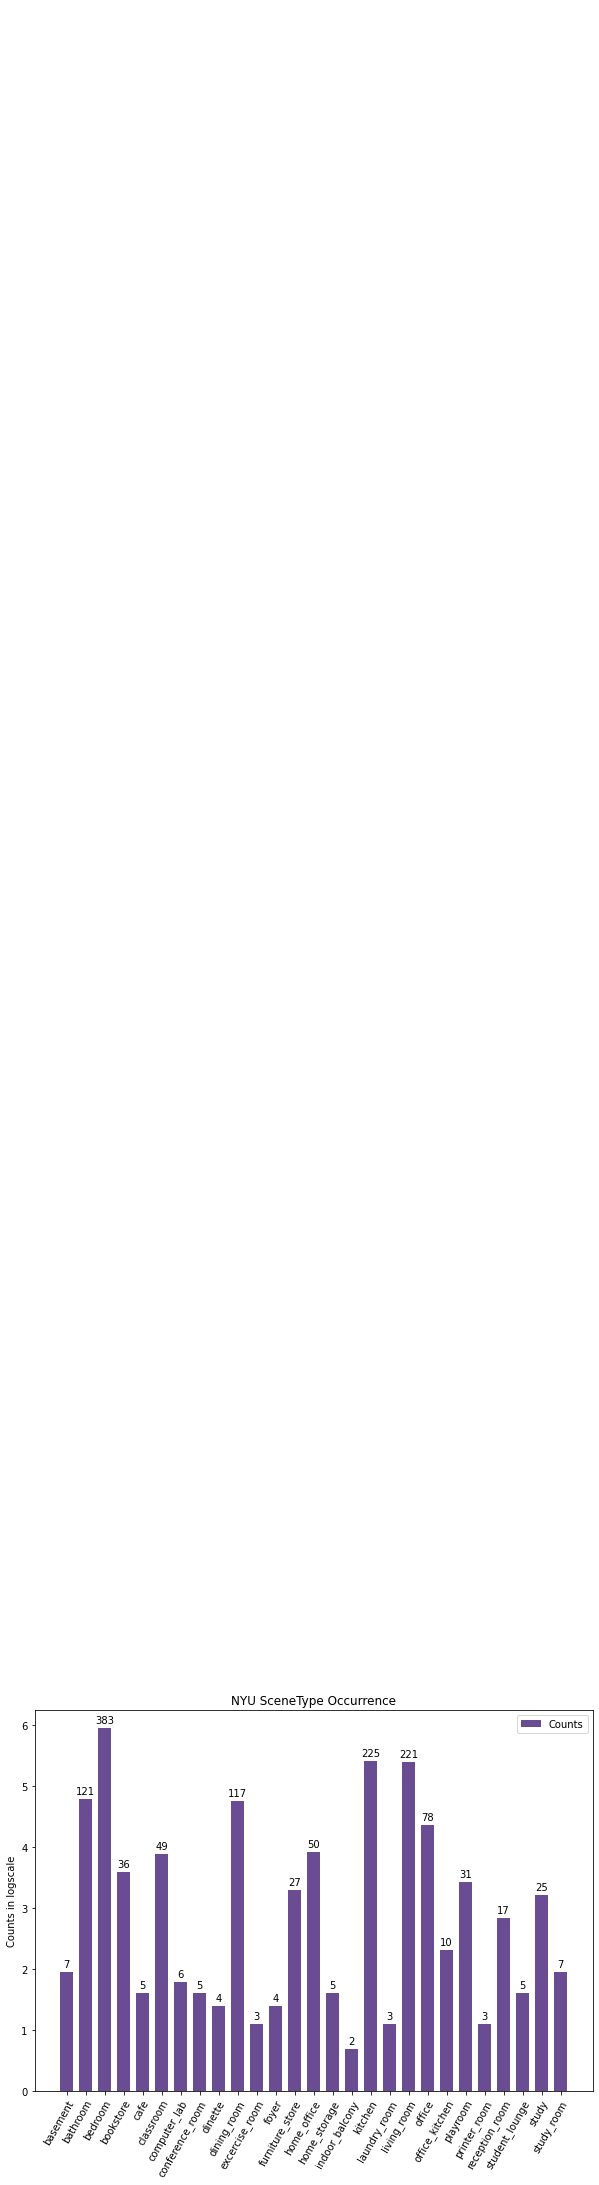

None

In [78]:
sceneTypes = pd.read_csv('/home/jonfrey/ASL/cfg/dataset/nyu/sceneTypes.csv').to_numpy()

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

col = { "red":[255,89,94,255],
 "yellow":[255,202,58,255],
 "green":[138,201,38,255],
 "blue":[25,130,196,255],
 "purple":[106,76,147,255] }
for k in col.keys():
    col[k] = [a/255.0 for a in col[k]]

(labels, counts) = np.unique(sceneTypes, return_counts=True)
labels = labels.tolist()
counts = counts.tolist()

counts_log = [np.log(x) for x in counts]

x = np.arange(len(labels))  # the label locations
width = 0.7  # the width of the bars

fig, ax = plt.subplots(figsize = (10,7))
rects1 = ax.bar(x, counts_log, width, label='Counts',color=col['purple'])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts in logscale')
ax.set_title('NYU SceneType Occurrence')
ax.set_xticks(x)
ax.set_xticklabels(labels)

#ax.xaxis.tick_top()
plt.setp(ax.get_xticklabels(), rotation=60, ha="right",
          rotation_mode="anchor")


ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for j, rect in enumerate( rects) :
        height = counts[j]
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width()-0.35, rect.get_height()),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

fig.savefig('/home/jonfrey/ASL/cfg/dataset/nyu/sceneTypes.png', dpi=600, transparent=False)
        
display( plt.show() )

In [97]:
names = pd.read_csv('/home/jonfrey/ASL/cfg/dataset/nyu/names.csv').to_numpy()[:,0]
scenes = pd.read_csv('/home/jonfrey/ASL/cfg/dataset/nyu/scenes.csv').to_numpy()[:,0]
sceneTypes = pd.read_csv('/home/jonfrey/ASL/cfg/dataset/nyu/sceneTypes.csv').to_numpy()[:,0]

np.where( sceneTypes == 'basement')[0] 
scenes = ['basement', 'foyer']
for s in scenes:
    arr = np.where( sceneTypes == s)[0]
    try:
        idx = np.concatenate( [idx, arr], axis=0)
    except:
        idx = arr
print(idx.shape)
    

(33,)


In [206]:
instances
index = pd.read_csv(f'cfg/dataset/nyu/train_indexes.csv').to_numpy()[:,0]-1 # from matlab to python
stats = instances[index]

(labels, counts) = np.unique(stats, return_counts=True)
print(labels, counts)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37.] [ 42998518 144597389  33542482  11362451   5234062   2562247   1480278
    882459    516307    490017    150821    136790     89435     47113
     36632     16853     21163     11774      7681      6153      7779
     13936       755       882      1020      1112       854       342
       351       283       439       258      1292      1334       595
       790       976       377]


In [208]:
normalized = counts / counts.sum()
normalized


array([1.76061804e-01, 5.92068712e-01, 1.37343103e-01, 4.65247109e-02,
       2.14313990e-02, 1.04913809e-02, 6.06114878e-03, 3.61331810e-03,
       2.11407151e-03, 2.00642443e-03, 6.17551920e-04, 5.60100563e-04,
       3.66200701e-04, 1.92908969e-04, 1.49993449e-04, 6.90063221e-05,
       8.66540553e-05, 4.82098401e-05, 3.14506355e-05, 2.51940841e-05,
       3.18519064e-05, 5.70623690e-05, 3.09142427e-06, 3.61143868e-06,
       4.17649371e-06, 4.55319706e-06, 3.49678983e-06, 1.40035377e-06,
       1.43720519e-06, 1.15877227e-06, 1.79753014e-06, 1.05640723e-06,
       5.29022537e-06, 5.46219864e-06, 2.43628800e-06, 3.23473532e-06,
       3.99633124e-06, 1.54366483e-06])

array([1.76061804e-01, 5.92068712e-01, 1.37343103e-01, 4.65247109e-02,
       2.14313990e-02, 1.04913809e-02, 6.06114878e-03, 3.61331810e-03,
       2.11407151e-03, 2.00642443e-03, 6.17551920e-04, 5.60100563e-04,
       3.66200701e-04, 1.92908969e-04, 1.49993449e-04, 6.90063221e-05,
       8.66540553e-05, 4.82098401e-05, 3.14506355e-05, 2.51940841e-05,
       3.18519064e-05, 5.70623690e-05, 3.09142427e-06, 3.61143868e-06,
       4.17649371e-06, 4.55319706e-06, 3.49678983e-06, 1.40035377e-06,
       1.43720519e-06, 1.15877227e-06, 1.79753014e-06, 1.05640723e-06,
       5.29022537e-06, 5.46219864e-06, 2.43628800e-06, 3.23473532e-06,
       3.99633124e-06, 1.54366483e-06])